RuntimeError: module was compiled against NumPy C-API version 0x10 (NumPy 1.23) but the running NumPy has C-API version 0xf. Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature n

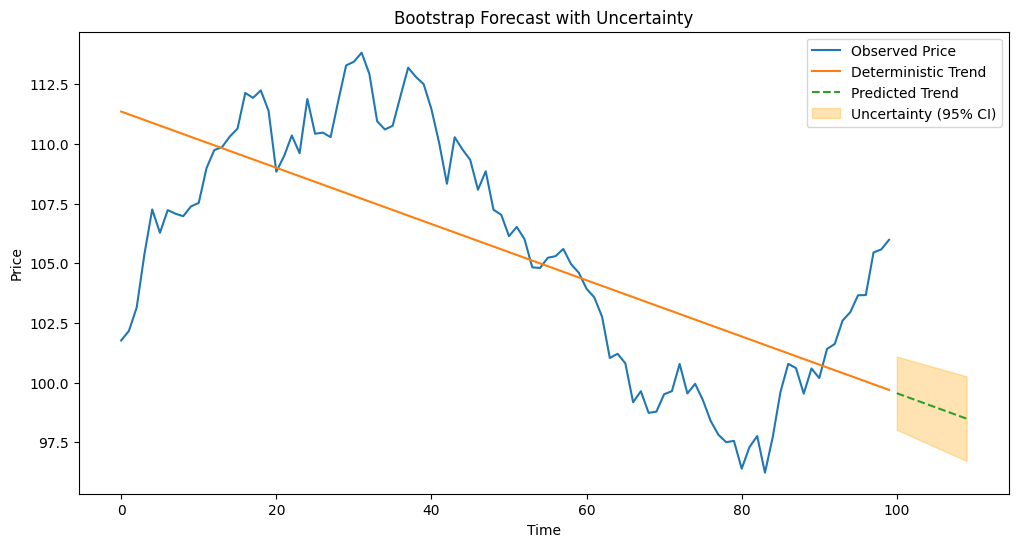

In [5]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.utils import resample
import matplotlib.pyplot as plt

# Сгенерируем временной ряд данных (или загрузим реальные данные)
np.random.seed(0)
n = 100
time = np.arange(n)
price_changes = np.random.normal(0, 1, n)
price = np.cumsum(price_changes) + 100  # Имитация рыночной цены

# Преобразуем данные в формат DataFrame
data = pd.DataFrame({'Time': time, 'Price': price})

# Настраиваем основную линейную модель для предсказания тренда
X = data[['Time']]
y = data['Price']
model = LinearRegression()
model.fit(X, y)
trend_pred = model.predict(X)

# Количество бутстреп выборок
n_bootstrap = 1000
predictions = []

# Генерация бутстреп выборок и прогнозов для каждой выборки
for i in range(n_bootstrap):
    X_resampled, y_resampled = resample(X, y, replace=True)
    model = LinearRegression()
    model.fit(X_resampled, y_resampled)

    # Прогнозируем будущее значение на 10 шагов вперед
    future_time = np.arange(n, n + 10).reshape(-1, 1)
    trend_future = model.predict(future_time)
    predictions.append(trend_future)

# Преобразуем результаты прогнозов
predictions = np.array(predictions)

# Рассчитаем среднее и доверительные интервалы
mean_pred = predictions.mean(axis=0)
std_pred = predictions.std(axis=0)

# Визуализация результатов
plt.figure(figsize=(12, 6))
plt.plot(data['Time'], data['Price'], label="Observed Price")
plt.plot(data['Time'], trend_pred, label="Deterministic Trend")
plt.plot(np.arange(n, n + 10), mean_pred, label="Predicted Trend", linestyle="--")
plt.fill_between(
    np.arange(n, n + 10),
    mean_pred - 2 * std_pred,
    mean_pred + 2 * std_pred,
    color='orange', alpha=0.3, label="Uncertainty (95% CI)"
)
plt.legend()
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("Bootstrap Forecast with Uncertainty")
plt.show()
